<h1 align="center">Wine Quality</h1>

# About the dataset

This repository has two datasets of **red and white wine samples** which consists of inputs includes objective tests

**Objective**
1. Understand the data using EDA(Extrapolatory Data Analysis)
2. Develop Linear Regression Model for predicting wine quality
3. Develop Ordinal Regression Model for predicting wine quality

# Load the libraries

In [1]:
%matplotlib inline
import os
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy import stats as st
from sklearn import preprocessing
from mord import OrdinalRidge
from sklearn.linear_model import LinearRegression
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report

# # Import Bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import d3
from bokeh.io import output_notebook
from bokeh.models import Legend
output_notebook()

Loading BokehJS ...

# Loading the Data

In [2]:
# Load the data
# directory containing the data files
data_dir = "./data/wine+quality"

wine_red_df = pd.read_csv(os.path.join(data_dir,"winequality-red.csv"), sep = ";")
wine_white_df = pd.read_csv(os.path.join(data_dir,"winequality-white.csv"), sep = ";")

In [3]:
# View first five samples of the Red wine data
wine_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# View first five samples of the White wine data
wine_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Thus we see that we have our data being loaded succesfully. But how many samples and variables we have in our dataset.? Ok lets take a time to answer that question.

In [5]:
# Dimension of the data
print("The Red wine dataset has", wine_red_df.shape[0], "number of observations and", 
      wine_red_df.shape[1], "variables")
print("The White wine dataset has", wine_white_df.shape[0], "number of observations and",
      wine_white_df.shape[1], "variables")

The Red wine dataset has 1599 number of observations and 12 variables
The White wine dataset has 4898 number of observations and 12 variables


# Exploratory Data Analysis

## Checking Null Values and Features Data Type

In [6]:
wine_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


From the above analysis we got to know that **there are no null values**

## Data Features

Thus we have seen dimensions of the data, both the dataset has same number of variables but white wine has almost thrice the amount of observations then the red wine dataset. Each wine sample (row) has the following characteristics (columns):

- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol
- Quality (score between 0 and 10)

## Understanding Data Distribution

In [8]:
np.round(wine_red_df.describe(),3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [9]:
np.round(wine_white_df.describe(),3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000
mean,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


## Observations

1. Mean residual sugar and total sulfur dioxide content in white wine seems to be much higher than red wine.
2. Mean value of sulphates, fixed acidity and volatile acidity seem to be higher in red wine as compared to white wine.
3. From all numbers, we can observe that citric acid is more present in white than red wines.
4. In general, white wines has half concentrations of chlorides then red wines.
5. Although in Ph the difference seems small it is interesting to note that it is slightly larger in green red wines.


# ANOVA Test

We use one way anova test for all features corresponding to red and white wine type and check with 95% confidence level if they are statistically significant from each other or not.

In [10]:

from scipy.stats import f_oneway

def oneway_anova_test(wine_red,wine_white,feature):
    F, p = f_oneway(wine_red[feature], 
                    wine_white[feature])
    if p <= 0.05:
        msg = 'Reject'
    else:
        msg = 'Acept'
    print('Feature:{:<35} F Statistic: {:.2f} \tp-value: {:.3f} \tNull Hypothesis: {}'.format(feature,F, p, msg))


print('ANOVA test across wine samples for all features for red and white wine type:\n')
features_list = wine_red_df.columns.tolist()
features_list.remove('quality')

for feature in features_list:
    oneway_anova_test(wine_red_df,wine_white_df,feature)


ANOVA test across wine samples for all features for red and white wine type:

Feature:fixed acidity                       F Statistic: 2016.51 	p-value: 0.000 	Null Hypothesis: Reject
Feature:volatile acidity                    F Statistic: 4829.32 	p-value: 0.000 	Null Hypothesis: Reject
Feature:citric acid                         F Statistic: 236.39 	p-value: 0.000 	Null Hypothesis: Reject
Feature:residual sugar                      F Statistic: 899.77 	p-value: 0.000 	Null Hypothesis: Reject
Feature:chlorides                           F Statistic: 2315.83 	p-value: 0.000 	Null Hypothesis: Reject
Feature:free sulfur dioxide                 F Statistic: 1858.14 	p-value: 0.000 	Null Hypothesis: Reject
Feature:total sulfur dioxide                F Statistic: 6252.80 	p-value: 0.000 	Null Hypothesis: Reject
Feature:density                             F Statistic: 1169.66 	p-value: 0.000 	Null Hypothesis: Reject
Feature:pH                                  F Statistic: 789.05 	p-value: 0.

### Observations

1. We observe that for all features we fail to reject null hypothesis that red and white wine type are statistically same.
2. Therefore we conclude that we need to do separate independent analysis for both red and white wine type

## Checking the distribution of Quality

First up lets check how the quality of wine is distributed accross. I am using barplot to visualize this because its the right choice to visualize any categoical data.

In [11]:
def custom_style(title, xlab, ylab, width = 400, height = 300):
    p = figure(width = width, height = height, title = title, x_axis_label = xlab, y_axis_label = ylab)
    p.title.text_font_size = "10pt"
    p.title.align = "center"
    p.xaxis.axis_label_text_font_size = "10pt"
    p.yaxis.axis_label_text_font_size = "10pt"
    return p

def custom_barplot(data, width = 400, height = 300, color = "#3687cc", title = "Barplot", xlab = "Category",
                   ylab = "Counts"):
    counts = data.value_counts()
    p = custom_style(width = width, height = height, title = title, xlab = xlab, ylab = ylab)
    p.vbar(x = counts.index, top = counts.values, width = 0.5, bottom = 0,  color = color)
    return show(p)

custom_barplot(wine_red_df.quality, title = "Red Wine Quality", xlab = "Quality Level", 
               ylab = "Counts")


custom_barplot(wine_white_df.quality, title = "White Wine Quality", xlab = "Quality Level", 
               ylab = "Counts")

### Observations 

1. We observe that data is highly imbalanced with little data for classes 3 and 8 ratings for red wine type and 3 and 9 for white wine type


## Correlation

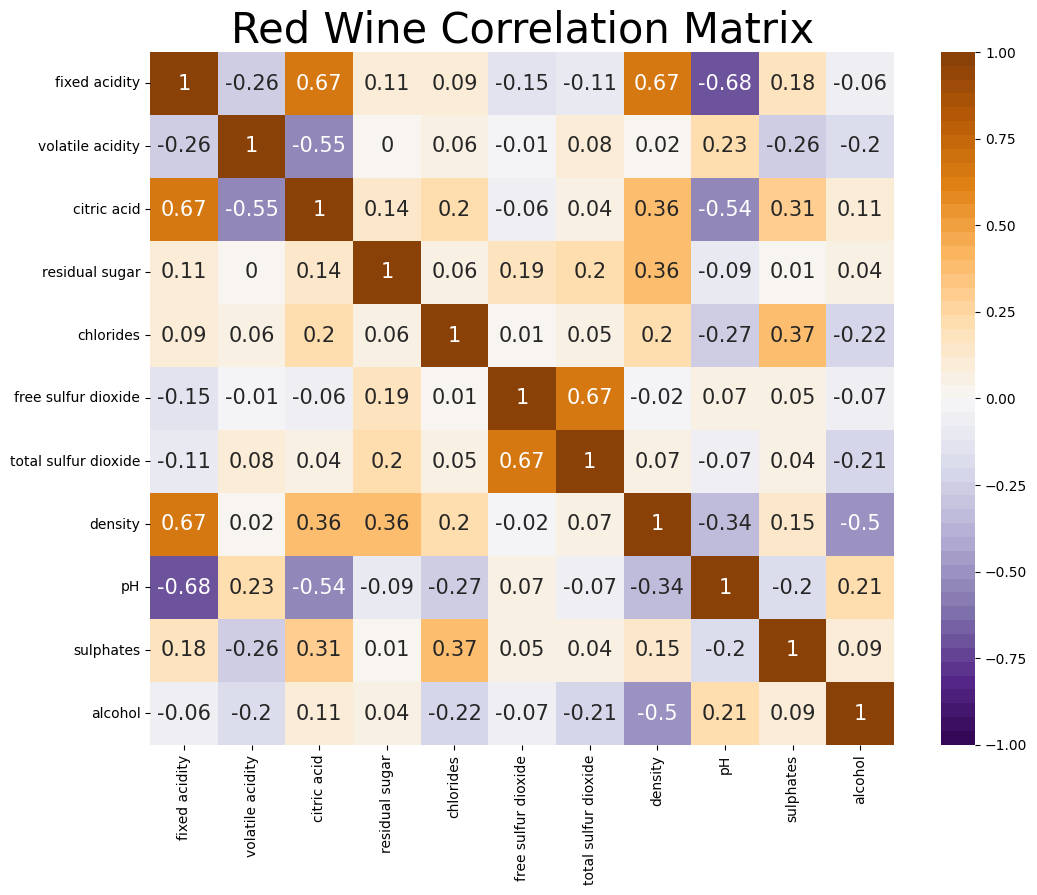

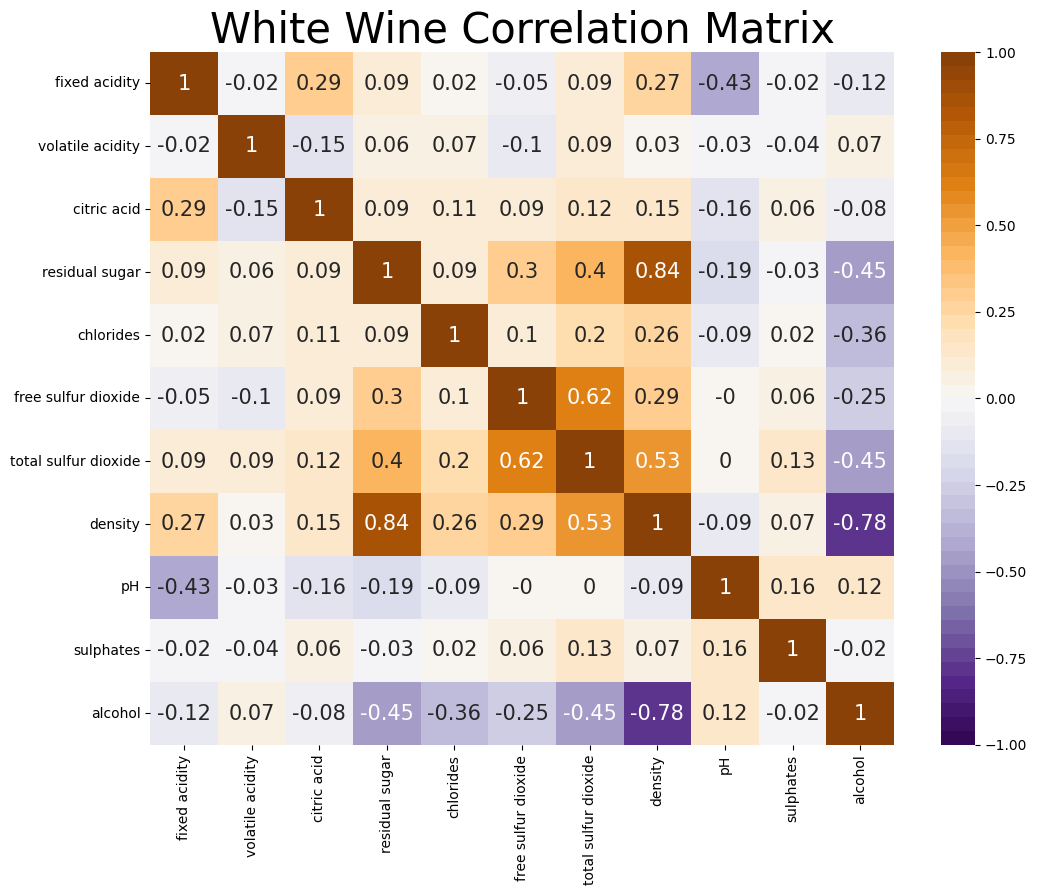

In [12]:
def coorelation_matrix_plot(data, title = "Wine Correlation Matrix", height = 9, width = 12):
    cor_mat = round(data.corr(method ="pearson"), 2)
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(cor_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    plt.show()
    
coorelation_matrix_plot(wine_red_df.iloc[:,:-1], title = "Red Wine Correlation Matrix")

coorelation_matrix_plot(wine_white_df.iloc[:,:-1], title = "White Wine Correlation Matrix")

# Observations

## 1. Red Wine

a. Citric acid and fixed acidity +ve coorelation= **+0.67**  
b. Density and fixed acidity +ve coorelation= **+0.67**  
c. pH and fixed acidity -ve coorelation= **-0.67**  

## 2. White Wine

a. Density and Residual Sugar +ve coorelation= **+0.84**  
b. Density and alcohol -ve coorelation= **-.78**  

# Outlier Detection

From the above two box plots we get to know about the outliers present in the data which must be removed for better machine learning prediction.

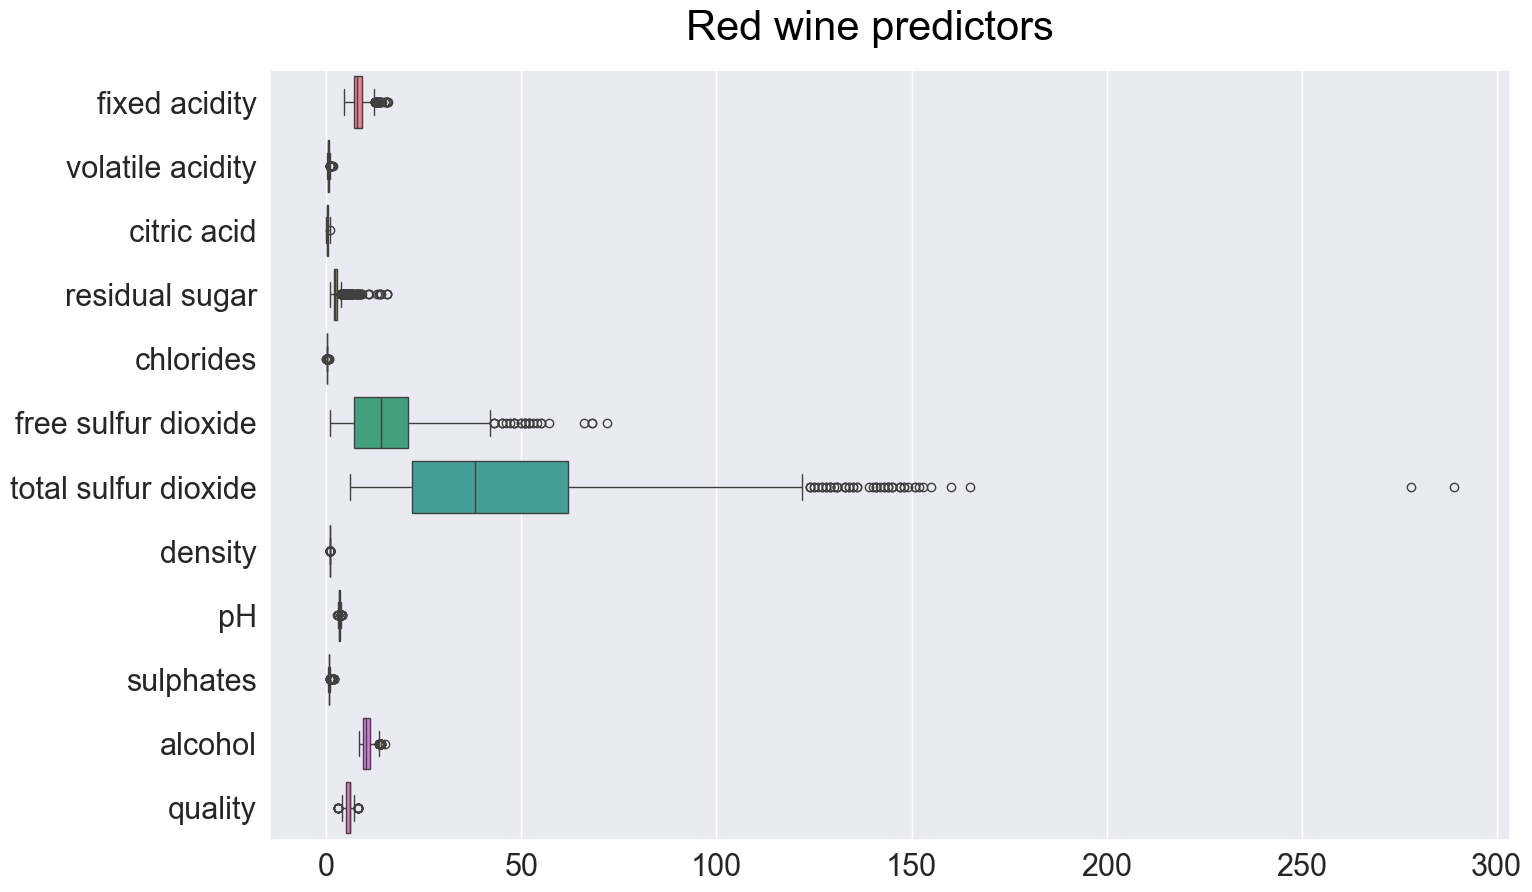

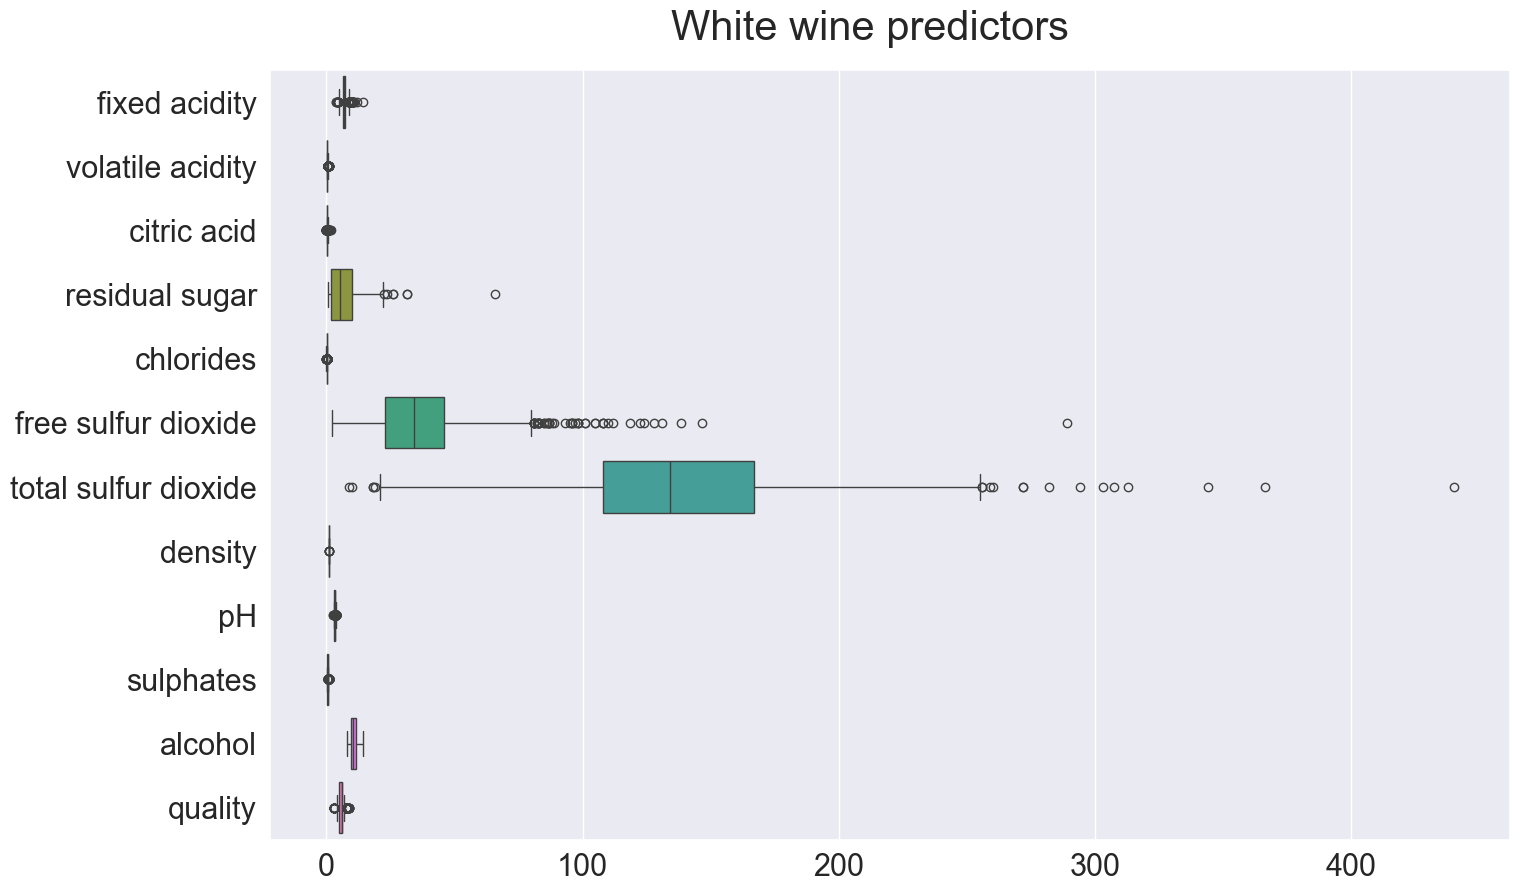

In [13]:
def box_plot(data, height = 10, width = 16, title = "Boxplot"):
    plt.figure(figsize=(width, height))
    plt.suptitle(title, y = 0.94, fontsize = 30)
    sns.set(font_scale = 2)
    sns.boxplot(data = data, orient = "h")
    
box_plot(data = wine_red_df, title = "Red wine predictors")


box_plot(data = wine_white_df, title = "White wine predictors")



Number of outlier data points for red wine 222 i.e 13.88% of total dataset
Number of outlier data points for white wine 72 i.e 1.47% of total dataset


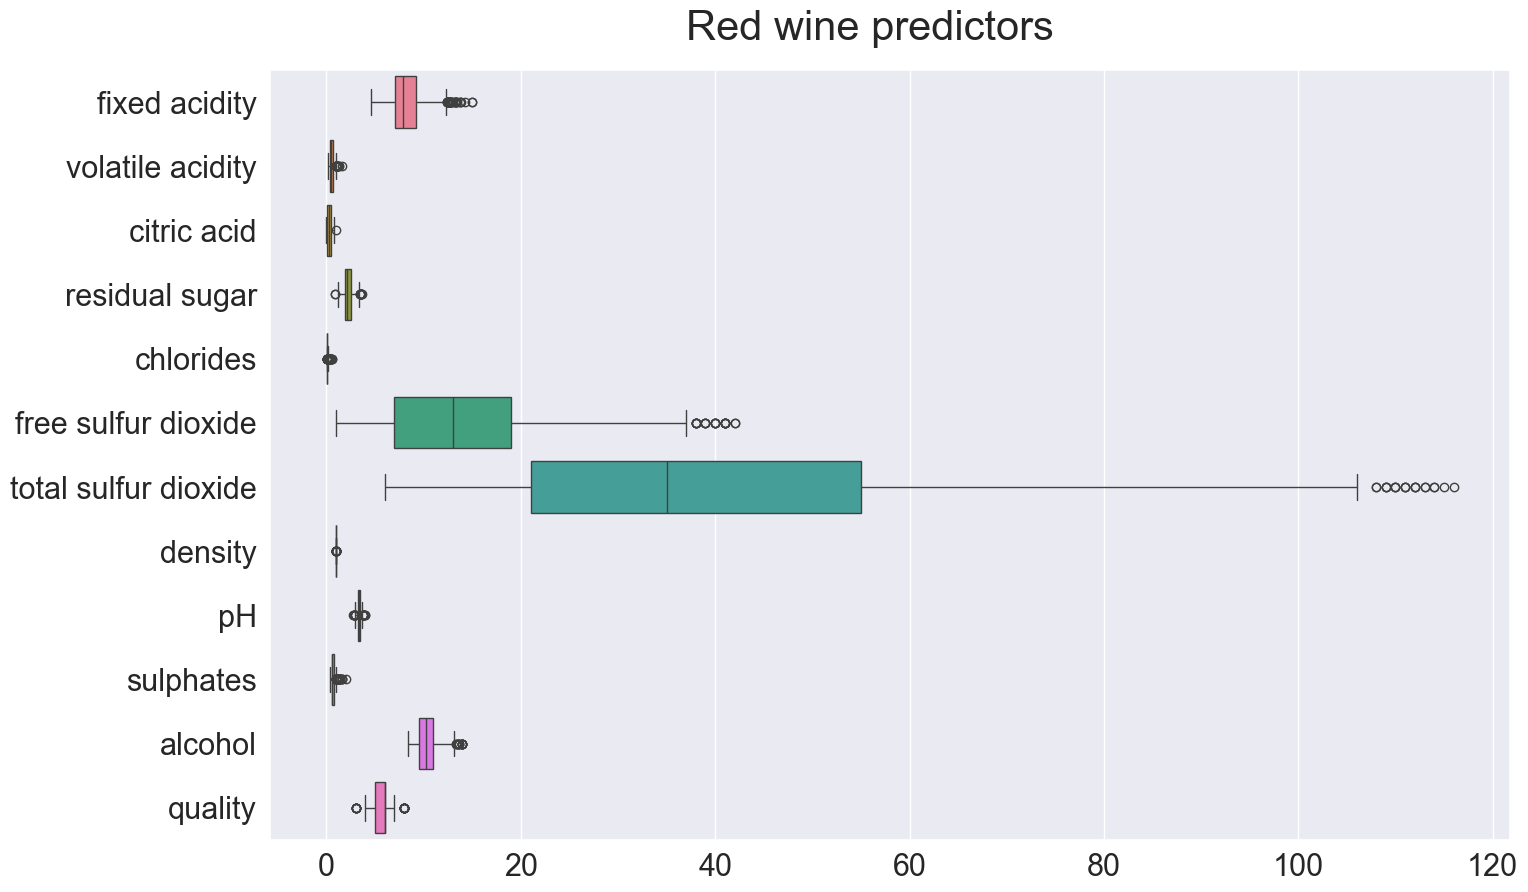

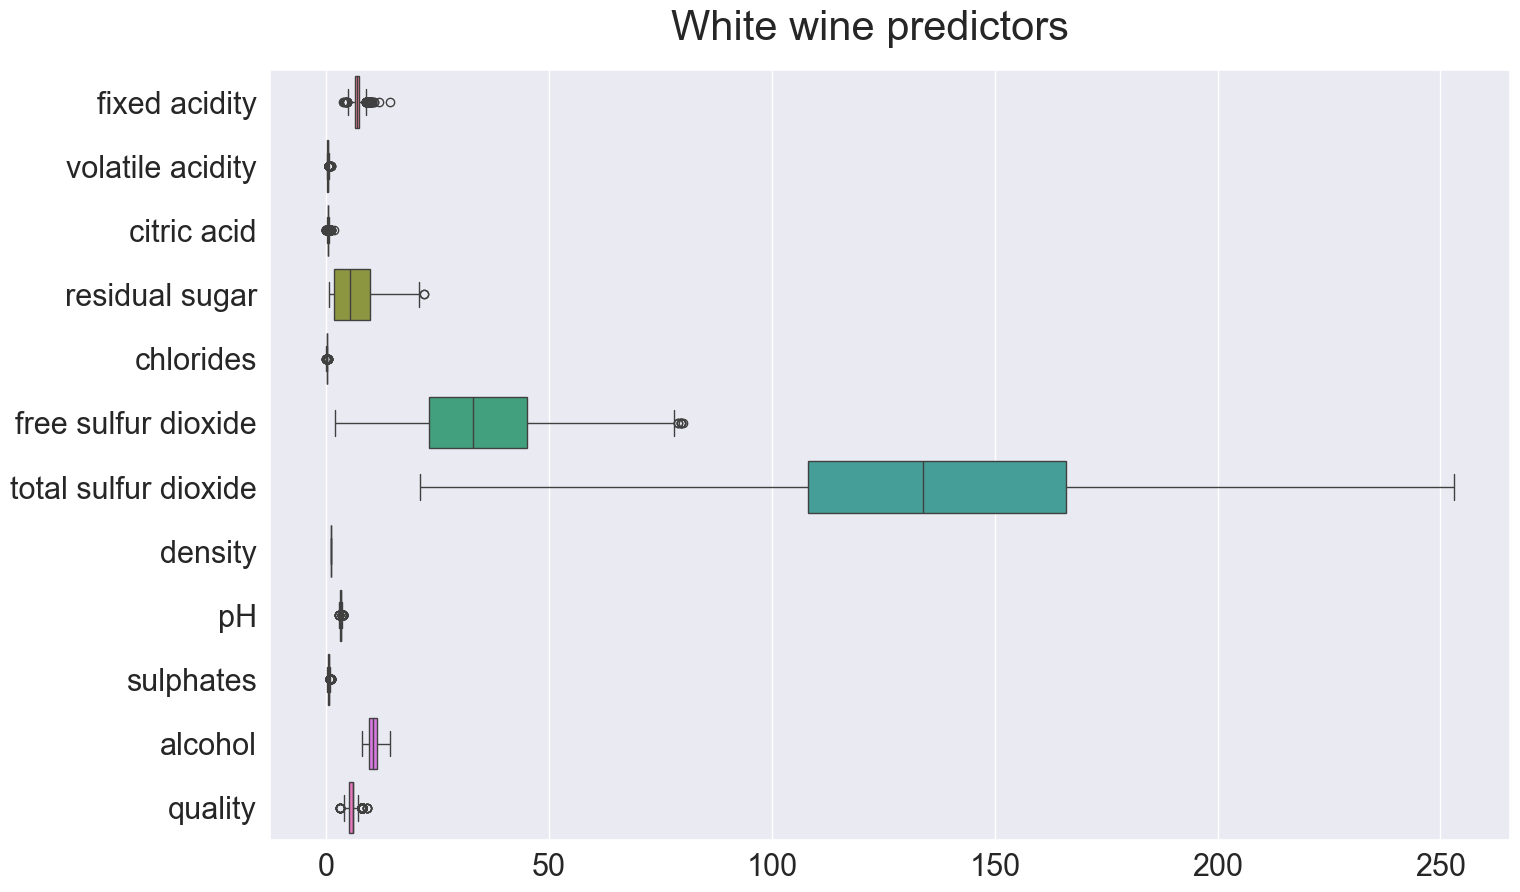

In [14]:

def remove_outliers(data,features_with_outliers):
    outliers_data = pd.DataFrame()
    for feature in features_with_outliers:
        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(data[feature], q=25)
        
        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(data[feature], q=75)
        
        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        interquartile_range = Q3 - Q1
        step = 1.5 * interquartile_range
        
        outliers_data = pd.concat([outliers_data,data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]])
        data = data[(data[feature]>=Q1 - step) & (data[feature]<=Q3 + step)]
        
    return outliers_data,data

# from the box plot we find that outliers are significantly present in the following list of features
features_with_outliers = ['free sulfur dioxide','total sulfur dioxide','residual sugar']

wine_red_outliers_data,wine_red_df_cleared = remove_outliers(wine_red_df,features_with_outliers)
wine_white_outliers_data,wine_white_df_cleared = remove_outliers(wine_white_df,features_with_outliers)

wine_red_df_cleared = wine_red_df_cleared.reset_index(drop=True)
wine_white_df_cleared = wine_white_df_cleared.reset_index(drop=True)

print(f"Number of outlier data points for red wine {wine_red_outliers_data.shape[0]} i.e {np.round((wine_red_outliers_data.shape[0]/wine_red_df.shape[0])*100,2)}% of total dataset")
print(f"Number of outlier data points for white wine {wine_white_outliers_data.shape[0]} i.e {np.round((wine_white_outliers_data.shape[0]/wine_white_df.shape[0])*100,2)}% of total dataset")

# we plot the box plot again and observe that there is significant reduction in number of outliers
box_plot(data = wine_red_df_cleared, title = "Red wine predictors")
box_plot(data = wine_white_df_cleared, title = "White wine predictors")


# Observations

1. We detect the outliers by fetching the data points whose values lies outside the IQR range
2. We observe that 222 data points out of 1599 i.e 13.88% of data points are outliers for Red Wine data
3. We observe that 72 data points out of 4898 data points are outliers for White Wine data
4. We plot the box plot again and observe that there is significant reduction in number of outliers
5. As we observe a signficant portion of data as outliers for Red Wine data we don't proceed with removal of outlier data points for red wine type as it will thus leave us with very less data points and create a model with high bias and therefore affect the model metrics 

# Standardizing the dataset

While doing EDA we observed that multiple features having varying ranges and has large difference between magnitudes which my affect our model performance,therefore we use MinMaxScaler to standardize the data

In [15]:
scaler = preprocessing.MinMaxScaler()

wine_red_df_preprocessed = pd.DataFrame(scaler.fit_transform(wine_red_df.iloc[:,:-1]))
wine_white_df_preprocessed = pd.DataFrame(scaler.fit_transform(wine_white_df_cleared.iloc[:,:-1]))

wine_red_df_preprocessed.columns = wine_red_df.columns[:-1]
wine_white_df_preprocessed.columns = wine_white_df_cleared.columns[:-1]

## Splitting the data set

We split the data in 80:20 ratio as asked in assignment to create the training and test data.

In [16]:

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(wine_red_df_preprocessed, wine_red_df.iloc[:, -1],
                                                    test_size=0.20, random_state=1)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(wine_white_df_preprocessed, wine_white_df_cleared.iloc[:, -1],
                                                    test_size=0.20, random_state=1)

In [17]:

def get_macro_mse(y_test,y_pred):
    """Function to find the macro averaged Mean Squared Error and macro averaged Mean Absolute Error"""
    mse_model_classes = [];mae_model_classes = []
    for class_label in np.unique(y_test):
        mask = y_test == class_label
        mse_model_class_error = mean_squared_error(y_test[mask], y_pred[mask])
        mae_model_class_error = mean_absolute_error(y_test[mask], y_pred[mask])
        mse_model_classes.append(mse_model_class_error)
        mae_model_classes.append(mae_model_class_error)
        
    macro_avg_mse = np.round(np.mean(mse_model_classes),2)
    macro_avg_mae = np.round(np.mean(mae_model_classes),2)
    return macro_avg_mse,macro_avg_mae

# MODEL TRAINING AND EVALUATION

We now proceed with applying linear regression and ordinal regression with the prepared data and evaluating their results on test data 

# Linear Regression

We apply **statsmodel.OLS** and **sklearn linear regression** library for calculation of various model metrics for Linear Regression

## Applying OLS 

We apply statsmodel ordinary least squares implementation of linear regression to fetch signficant features and other list of metrics for Linear Regression


### Red Wine 

In [18]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(wine_red_df_preprocessed, wine_red_df.iloc[:, -1],
                                                    test_size=0.20, random_state=1)
# for red wine
X_with_constant = sm.add_constant(X_train_red)
model = sm.OLS(y_train_red, X_with_constant)

results = model.fit()
print("ORDINARY LEAST SQUARES -Red Wine - RESULT")
print(results.summary())




ORDINARY LEAST SQUARES -Red Wine - RESULT
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     66.37
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          5.49e-117
Time:                        20:34:36   Log-Likelihood:                -1269.1
No. Observations:                1279   AIC:                             2562.
Df Residuals:                    1267   BIC:                             2624.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

### Observation

1. From above OLS result with 95% confidence interval threshold we find that features like **'fixed_acidity','citric acid','residual sugar','density','pH'**  are insignificant features

2. Therefore we retrain the OLS Model after removing insignificant features.

In [19]:

# removing irrelevant columns
wine_red_df_preprocessed = wine_red_df_preprocessed.drop(['fixed acidity','density','residual sugar','citric acid','pH'],axis=1)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(wine_red_df_preprocessed, wine_red_df.iloc[:, -1],
                                                    test_size=0.20, random_state=1)

X_with_constant = sm.add_constant(X_train_red)
model = sm.OLS(y_train_red, X_with_constant)

results = model.fit()
print("ORDINARY LEAST SQUARES - RESULT")
print(results.summary())

ORDINARY LEAST SQUARES - RESULT
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     117.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          7.00e-118
Time:                        20:34:36   Log-Likelihood:                -1278.6
No. Observations:                1279   AIC:                             2571.
Df Residuals:                    1272   BIC:                             2607.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------


### White Wine

In [20]:
# for white wine
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(wine_white_df_preprocessed, wine_white_df_cleared.iloc[:, -1],
                                                    test_size=0.20, random_state=1)

X_with_constant = sm.add_constant(X_train_white)
model = sm.OLS(y_train_white, X_with_constant)

results = model.fit()
print("ORDINARY LEAST SQUARES -White Wine - RESULT")
print(results.summary())

ORDINARY LEAST SQUARES -White Wine - RESULT
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     142.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          7.29e-276
Time:                        20:34:36   Log-Likelihood:                -4320.9
No. Observations:                3860   AIC:                             8666.
Df Residuals:                    3848   BIC:                             8741.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Observation

1. From above OLS result with 95% confidence interval threshold we find that features like **'chlorides','citric acid','total sulfur dioxide'**  are insignificant features

2. Therefore we retrain the OLS Model after removing insignificant features.

In [21]:

# removing irrelevant columns
wine_white_df_preprocessed = wine_white_df_preprocessed.drop(['chlorides','total sulfur dioxide','citric acid'],axis=1)


X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(wine_white_df_preprocessed, wine_white_df_cleared.iloc[:, -1],
                                                    test_size=0.20, random_state=1)

X_with_constant = sm.add_constant(X_train_white)
model = sm.OLS(y_train_white, X_with_constant)

results = model.fit()
print("ORDINARY LEAST SQUARES - RESULT")
print(results.summary())

ORDINARY LEAST SQUARES - RESULT
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.19e-279
Time:                        20:34:36   Log-Likelihood:                -4321.0
No. Observations:                3860   AIC:                             8660.
Df Residuals:                    3851   BIC:                             8716.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
co

## Applying Scikit Learn Linear Regression

### Red Wine

In [22]:
# applying linear regression on red wine data
linear_model = LinearRegression()
linear_model.fit(X_train_red, y_train_red)
y_pred = linear_model.predict(X_test_red)


# Evaluate Ordinal Regression
mse_linear = np.round(mean_squared_error(y_pred, y_test_red),2)
print("Micro MSE linear Red",mse_linear)
print("Macro MSE={0} and MAE={1}".format(*get_macro_mse(y_test_red,y_pred)))

Micro MSE linear Red 0.38
Macro MSE=1.51 and MAE=1.06


### White Wine

In [23]:

# applying linear regression on white wine data
linear_model = LinearRegression()
linear_model.fit(X_train_white, y_train_white)
y_pred = linear_model.predict(X_test_white)


# Evaluate Linear Regression
mse_linear = np.round(mean_squared_error(y_pred, y_test_white),2)
print("Micro MSE linear White",mse_linear)
print("Macro MSE={0} and MAE={1}".format(*get_macro_mse(y_test_white,y_pred)))


Micro MSE linear White 0.54
Macro MSE=3.35 and MAE=1.48


# Ordinal Regression

We use Ordinal Ridge from mord library and statsmodel.OrderedModel to get various model metrics 

## Applying Ordinal Ridge

We use the Ordinal Ridge from mord package to get metrics of accuracy score,classification report and Macro Mean Squared Error and Micro Mean Squared error

### Red Wine 

In [24]:

model = OrdinalRidge()
model.fit(X_train_red, y_train_red)

# Predict on the test set
y_pred = model.predict(X_test_red)

# Evaluate Ordinal Regression
mse_ordinal = np.round(mean_squared_error(y_pred, y_test_red),2)
print("Micro MSE ordinal ",mse_ordinal)

print("Macro MSE={0} and MAE={1}".format(*get_macro_mse(y_test_red,y_pred)))


print("Accuracy score ",accuracy_score(y_pred,y_test_red))
print("Classification Report of RED WINE data")
report = classification_report(y_test_red, y_pred)
print(report)

Micro MSE ordinal  0.45
Macro MSE=1.72 and MAE=1.07
Accuracy score  0.6375
Classification Report of RED WINE data
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.72      0.71      0.72       140
           6       0.59      0.76      0.66       134
           7       0.25      0.07      0.11        30
           8       0.00      0.00      0.00         2

    accuracy                           0.64       320
   macro avg       0.26      0.26      0.25       320
weighted avg       0.59      0.64      0.60       320



### White Wine

In [25]:

model = OrdinalRidge()
model.fit(X_train_white, y_train_white)

# Predict on the test set
y_pred = model.predict(X_test_white)

# Evaluate Ordinal Regression
mse_ordinal = np.round(mean_squared_error(y_pred, y_test_white),2)
print("MSE ordinal",np.round(mse_ordinal,2))

print("Macro MSE={0} and MAE={1}".format(*get_macro_mse(y_test_white,y_pred)))
print("Accuracy score ",np.round(accuracy_score(y_pred,y_test_white),2))

print("Classification Report of WHITE WINE data")
report = classification_report(y_test_white, y_pred)
print(report)


MSE ordinal 0.61
Macro MSE=3.25 and MAE=1.44
Accuracy score  0.54
Classification Report of WHITE WINE data
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       1.00      0.07      0.12        30
           5       0.65      0.40      0.49       299
           6       0.51      0.81      0.63       424
           7       0.51      0.32      0.39       179
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00         1

    accuracy                           0.54       966
   macro avg       0.38      0.23      0.23       966
weighted avg       0.55      0.54      0.50       966



## Applying Ordered Model

We use **statsmodel.OrderedModel**  to get list of other metrics responsible for fitting the ordinal regression model on the data



### Red Wine

In [26]:
mod_prob = OrderedModel(wine_red_df.iloc[:,-1],wine_red_df_preprocessed,distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()



Optimization terminated successfully.
         Current function value: 0.967294
         Iterations: 78
         Function evaluations: 81
         Gradient evaluations: 81


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                quality   Log-Likelihood:                -1546.7
Model:                   OrderedModel   AIC:                             3115.
Method:            Maximum Likelihood   BIC:                             3175.
Date:                Tue, 10 Oct 2023                                         
Time:                        20:34:37                                         
No. Observations:                1599                                         
Df Residuals:                    1588                                         
Df Model:                           6                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -4.9335      0.470    -10.503      0.000      -5.854      -4.013
chlorides               -2.8993      0.752     -3.858      0.000      -4.372      -1.426
free sulfur dioxide      0.9393      0.465      2.020      0.043       0.028       1.850
total sulfur dioxide    -3.1723      0.635     -4.994      0.000      -4.417      -1.927
sulphates                4.7175      0.587      8.035      0.000       3.567       5.868
alcohol                  5.4608      0.366     14.918      0.000       4.743       6.178
3/4                     -5.2861      0.404    -13.088      0.000      -6.078      -4.495
4/5                      0.6498      0.154      4.225      0.000       0.348       0.951
5/6                      1.3104      0.039     33.496      0.000       1.234       1.387
6/7                      1.0373      0.038     27.634      0.000       0.964       1.111
7/8                      1.0969      0.080     13.738      0.000       0.940       1.253
========================================================================================
"""

### White Wine

In [27]:

mod_log = OrderedModel(wine_white_df_cleared.iloc[:,-1],wine_white_df_preprocessed,distr='logit')

res_log = mod_log.fit(method='bfgs')
res_log.summary()



Optimization terminated successfully.
         Current function value: 1.102678
         Iterations: 108
         Function evaluations: 110
         Gradient evaluations: 110


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                quality   Log-Likelihood:                -5321.5
Model:                   OrderedModel   AIC:                         1.067e+04
Method:            Maximum Likelihood   BIC:                         1.076e+04
Date:                Tue, 10 Oct 2023                                         
Time:                        20:34:38                                         
No. Observations:                4826                                         
Df Residuals:                    4812                                         
Df Model:                           8                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
fixed acidity           3.3546      0.623      5.387      0.000       2.134       4.575
volatile acidity       -5.0668      0.305    -16.603      0.000      -5.665      -4.469
residual sugar          5.6335      0.476     11.834      0.000       4.700       6.567
free sulfur dioxide     1.1767      0.154      7.660      0.000       0.876       1.478
density                -8.5172      0.887     -9.607      0.000     -10.255      -6.780
pH                      2.6873      0.320      8.406      0.000       2.061       3.314
sulphates               1.6064      0.227      7.074      0.000       1.161       2.052
alcohol                 1.9546      0.477      4.101      0.000       1.020       2.889
3/4                    -6.1831      0.412    -14.997      0.000      -6.991      -5.375
4/5                     0.9878      0.098     10.124      0.000       0.797       1.179
5/6                     1.1248      0.027     41.103      0.000       1.071       1.178
6/7                     0.9581      0.020     48.571      0.000       0.919       0.997
7/8                     0.8230      0.034     24.204      0.000       0.756       0.890
8/9                     1.2941      0.121     10.680      0.000       1.057       1.532
=======================================================================================
"""

# Further Improvements

1. As we observe that data is highly imblanced therefore addition of more data points in deficient classes will make the model more stable and improve the model metrics.
2. We can develop more signficant features by doing feature engineering which will improve the model metrics further.
3. We can apply more advanced models like SVM,Decision Tree,Random Forest,XGboost to improve model metrics further